<a href="https://colab.research.google.com/github/sanskarpyml/Animal-classification/blob/main/animal_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all dependencies


In [ ]:
#Import Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import matplotlib.image as mpimg
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#checking for the classes
print(os.listdir("/content/drive/MyDrive/animal_classification/Animal Classification/dataset"))

['Dolphin', 'Kangaroo', 'Tiger', 'Dog', 'Elephant', 'Zebra', 'Panda', 'Lion', 'Giraffe', 'Horse', 'Bird', 'Cow', 'Deer', 'Bear', 'Cat']


In [ ]:
#checking for the number of images per class
print(len(os.listdir("/content/drive/MyDrive/animal_classification/Animal Classification/dataset/Dolphin")))

129


In [ ]:
#Define Paths
dataset_path = "/content/drive/MyDrive/animal_classification/Animal Classification/dataset"

(224, 224, 3)


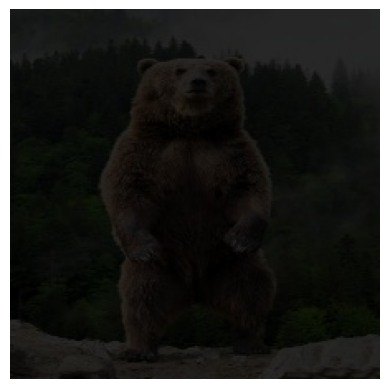

In [ ]:
image_path = "/content/drive/MyDrive/animal_classification/Animal Classification/dataset/Bear/Bear_10_3.jpg"
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
 #Load Dataset (image_dataset_from_directory)
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 42

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


class_names = train_ds.class_names
print("Classes:", class_names)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [ ]:
#Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
 #Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:
#Build Model
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    data_augmentation,
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,527 (84.87 MB)

 Trainable params: 22,248,527 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 8: Compute Class Weights
# Extract labels from training dataset
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(labels.numpy())

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: np.float64(0.9879365079365079), 1: np.float64(0.9604938271604938), 2: np.float64(0.9786163522012579), 3: np.float64(1.0071197411003237), 4: np.float64(0.9879365079365079), 5: np.float64(1.0478114478114477), 6: np.float64(1.027062706270627), 7: np.float64(0.9345345345345345), 8: np.float64(1.027062706270627), 9: np.float64(0.9786163522012579), 10: np.float64(1.0478114478114477), 11: np.float64(1.0478114478114477), 12: np.float64(0.943030303030303), 13: np.float64(1.127536231884058), 14: np.float64(0.9345345345345345)}


In [ ]:
# Step 9: Train Model
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.0965 - loss: 2.9699 - val_accuracy: 0.1469 - val_loss: 2.5451
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.1233 - loss: 2.6127 - val_accuracy: 0.2474 - val_loss: 2.4027
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.1736 - loss: 2.5403 - val_accuracy: 0.2835 - val_loss: 2.2823
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.2724 - loss: 2.2620 - val_accuracy: 0.3686 - val_loss: 2.1365
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.3288 - loss: 2.1128 - val_accuracy: 0.3995 - val_loss: 2.1178
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.3781 - loss: 2.0014 - val_accuracy: 0.4098 - val_loss: 2.1918
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.4170 - loss: 1.8513 - val_accuracy: 0.4201 - val_loss: 1.9441
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.4440 - loss: 1.7838 - val_accuracy: 

In [ ]:
# Step 10: Evaluate Model
val_labels = []
val_preds = []

for images, labels in val_ds:
    preds = model.predict(images)
    val_preds.extend(np.argmax(preds, axis=1))
    val_labels.extend(labels.numpy())

print("\nClassification Report:\n")
print(classification_report(val_labels, val_preds, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Classification Report:

              precision    recall  f1-score   support

        Bear       0.63      0.60      0.62        20
        Bird       0.84      0.55      0.67        29
         Cat       0.46      0.65      0.54        17
         Cow       0.94      0.61      0.74        28
        Deer       0.71      0.45      0.56        22
         Dog       0.66      0.83      0.73        23
     Dolphin       0.88      1.00      0.93        28
    Elephant       0.71      0.45      0.56   

def load_and_preprocess_image(image_path, target_size=(224, 224)):
  #load the image
  img = Image.open(image_path)
  #resize the image
  img = img.resize(target_size)
  #convert the image to a numpy array
  img_array = np.array(img)
  #Add batch dimension
  img_array = np.expand_dims(img_array, axis=0)
  #scle the image value to [0,1]
  img_array = img_array.astype('float32') / 255.0
  return img_array

#function to predict the class of an image
def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  prediction = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_process_image(img_path, img_size=(224, 224)):
    """
    Load and preprocess an image from disk.

    Args:
        img_path (str): Path to the image file.
        img_size (tuple): Target size to resize image.

    Returns:
        img_array (ndarray): Preprocessed image ready for prediction.
        original_img (PIL.Image): Original image for display.
    """
    original_img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(original_img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array, original_img

In [ ]:
def predict_image_class(model, img_array, class_names):
    """
    Predict the class of the image using a trained model.

    Args:
        model: Trained Keras model.
        img_array (ndarray): Preprocessed image array.
        class_names (list): List of class names.

    Returns:
        predicted_class (str): Name of the predicted class.
        confidence (float): Prediction confidence percentage.
    """
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction) * 100
    return predicted_class, confidence

In [ ]:
import json
with open('classes.json', 'w') as f:
    json.dump(class_names, f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted: Panda (85.72%)


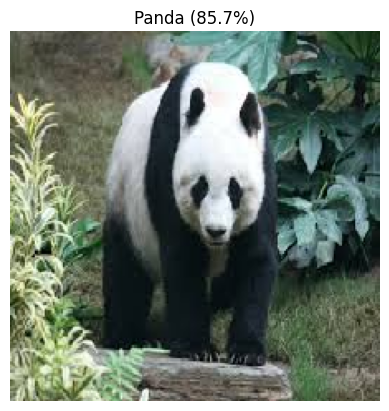

In [ ]:
img_array, raw_img = load_and_process_image('/content/images (1).jpg')  # Change path as needed
predicted_class, confidence = predict_image_class(model, img_array, class_names)
print(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.imshow(raw_img)
plt.title(f"{predicted_class} ({confidence:.1f}%)")
plt.axis('off')
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/animal_classification/Animal_Classification.h5")